# Part C – Programming Task

### A* Search on a Maze
In this notebook, we implement A* search for a maze represented as a 2D matrix:
- `1 = wall`
- `0 = path`
- `A = start`
- `B = goal`

We test three heuristic cases:
1. Manhattan distance (admissible, consistent)
2. Manhattan distance × 1.5 (admissibility check)
3. A heuristic that violates consistency


In [1]:
import heapq
import matplotlib.pyplot as plt
import numpy as np

# Maze example (5x5)
# 0 = free cell, 1 = wall
# We'll mark start (A) and goal (B) separately
maze = [
    [0, 0, 0, 1, 0, 0, 0, 1, 0],
    [0, 1, 0, 0, 0, 1, 0, 0, 0],
    [0, 1, 1, 1, 0, 0, 1, 0, 0],
    [0, 0, 0, 0, 1, 0, 0, 0, 1],
    [1, 1, 0, 1, 0, 0, 1, 0, 0],
    [0, 0, 0, 0, 1, 1, 0, 0, 1],
    [0, 1, 1, 0, 0, 0, 0, 1, 0],
    [0, 0, 0, 1, 1, 0, 1, 0, 0],
    [0, 1, 0, 0, 0, 0, 0, 0, 0]
]


start = (0, 0)  #A
goal = (8, 8)   #B


def manhattan(a, b):
    return abs(a[0]-b[0]) + abs(a[1]-b[1])

def astar(maze, start, goal, heuristic_fn):
    rows, cols = len(maze), len(maze[0])
    open_set = []
    heapq.heappush(open_set, (0+heuristic_fn(start,goal), 0, start, [start]))
    visited = {}
    
    while open_set:
        f, g, node, path = heapq.heappop(open_set)
        if node in visited and visited[node] <= g:
            continue
        visited[node] = g
        if node == goal:
            return path, g
        for dx,dy in [(1,0),(-1,0),(0,1),(0,-1)]:
            nx, ny = node[0]+dx, node[1]+dy
            if 0<=nx<rows and 0<=ny<cols and maze[nx][ny]==0:
                new_g = g+1
                new_f = new_g + heuristic_fn((nx,ny), goal)
                heapq.heappush(open_set,(new_f,new_g,(nx,ny), path+[(nx,ny)]))
    return None, float('inf')

def visualize_path(maze, path, start, goal, title):
    arr = np.array(maze)
    arr[start] = 2
    arr[goal] = 3
    fig, ax = plt.subplots(figsize=(5,5))
    ax.imshow(arr, cmap='gray_r')
    if path:
        xs = [y for x,y in path]
        ys = [x for x,y in path]
        ax.plot(xs, ys, color='red', linewidth=2)
    ax.set_title(title)
    plt.show()


## Case 1: Manhattan Distance (Admissible, Consistent)

Case 1: Manhattan distance
Path: [(0, 0), (1, 0), (2, 0), (3, 0), (3, 1), (3, 2), (4, 2), (5, 2), (5, 3), (6, 3), (6, 4), (6, 5), (7, 5), (8, 5), (8, 6), (8, 7), (8, 8)]
Cost: 16


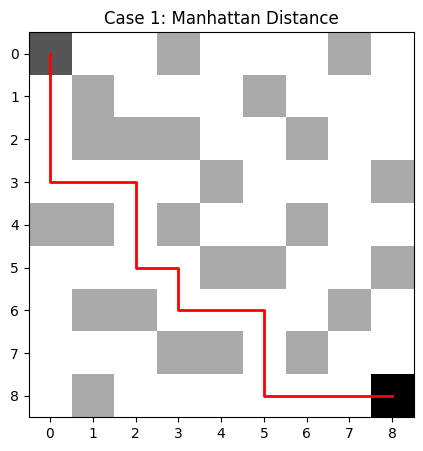

In [2]:
path1, cost1 = astar(maze, start, goal, manhattan)
print("Case 1: Manhattan distance")
print("Path:", path1)
print("Cost:", cost1)
visualize_path(maze, path1, start, goal, "Case 1: Manhattan Distance")


## Case 2: Manhattan Distance × 1.5
We check if multiplying the heuristic by 1.5 remains admissible.

Case 2: Manhattan * 1.5
Path: [(0, 0), (0, 1), (0, 2), (1, 2), (1, 3), (1, 4), (2, 4), (2, 5), (3, 5), (3, 6), (3, 7), (4, 7), (5, 7), (5, 6), (6, 6), (6, 5), (7, 5), (8, 5), (8, 6), (8, 7), (8, 8)]
Cost: 20


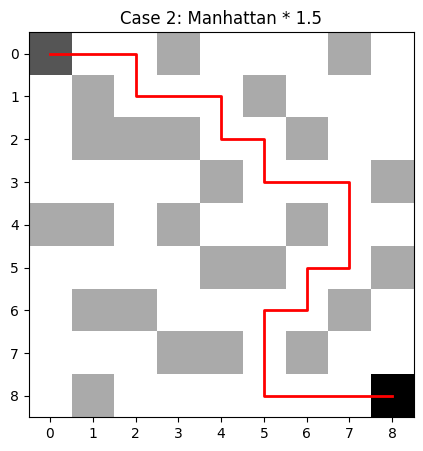

Observation: Multiplying heuristic by 1.5 can overestimate true cost, so it is NOT admissible.


In [3]:
def heuristic_1_5(a,b):
    return 1.5*manhattan(a,b)

path2, cost2 = astar(maze, start, goal, heuristic_1_5)
print("Case 2: Manhattan * 1.5")
print("Path:", path2)
print("Cost:", cost2)
visualize_path(maze, path2, start, goal, "Case 2: Manhattan * 1.5")
print("Observation: Multiplying heuristic by 1.5 can overestimate true cost, so it is NOT admissible.")


## Case 3: Inconsistent Heuristic
We define a heuristic that violates consistency: for node (0,0), we deliberately set h=10.

Case 3: Inconsistent heuristic
Path: [(0, 0), (1, 0), (2, 0), (3, 0), (3, 1), (3, 2), (4, 2), (5, 2), (5, 3), (6, 3), (6, 4), (6, 5), (7, 5), (8, 5), (8, 6), (8, 7), (8, 8)]
Cost: 16


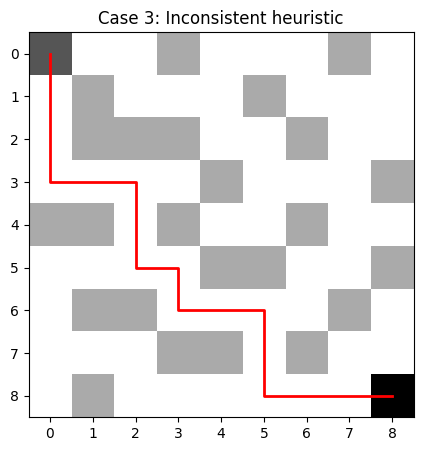

Observation: Heuristic is NOT admissible and also not consistent; this can mislead A* and cause wrong expansions or non-optimal paths.


In [4]:
def inconsistent_h(a,b):
    if a == start:
        return 10  # deliberately high, breaks admissibility & consistency
    return manhattan(a,b)

path3, cost3 = astar(maze, start, goal, inconsistent_h)
print("Case 3: Inconsistent heuristic")
print("Path:", path3)
print("Cost:", cost3)
visualize_path(maze, path3, start, goal, "Case 3: Inconsistent heuristic")
print("Observation: Heuristic is NOT admissible and also not consistent; "
      "this can mislead A* and cause wrong expansions or non-optimal paths.")
